# Ocean-Atmosphere CO<sub>2</sub> Fluxes

## Introduction
The oceans have absorbed around 1/3 of all the CO<sub>2</sub> we have released into the atmosphere.
The exchange of CO<sub>2</sub> between the atmosphere and oceans depends primarily on the concentration gradient between the surface ocean and atmosphere.
The concentration of CO<sub>2</sub> in the surface ocean depends on the complex interaction of physical and biological parameters, and is difficult to predict with models.
The most reliable way to know CO<sub>2</sub> is to measure it, but accurate measurements require in-situ water sampling and titration methods.

There have been extensive global efforts to make these measurements, but they are both spatially and temporally patchy.
Monitoring of air-sea CO<sub>2</sub> exchange in a meaningful way requires spatially and temporally continuous information.
<img src="https://www.socat.info/wp-content/uploads/2019/06/socatv2019_map.png" width="70%">
<div style="text-align: center">Locations of moorings and tracks of ships and drifters for all data in SOCAT version 2019 (1970-2019).</div>

In this exercise, we will explore the ability of models to predict air-sea CO<sub>2</sub> fluxes using on biological and physical parameters that can be measured by remote sensing.

## Predictors
The standard set of variables known to represent the *physical* and *biogeochemical* drivers of surface ocean pCO2 are sea surface salinity (SSS), sea surface temperature (SST), mixed layer depth (MLD), chlorophyll-a concentration (CHL), sea surface height (SSH) and the atmospheric CO_2 mole fraction ($xCO_{2, atm}$) (Takahashi et al., 2009; Land- schützer et al., 2013).

### Training Data
Gridded fCO<sub>2</sub> data from the SOCAT programme are combined with remote sensing data to provide the training set including data from January, February and March from 2001 onwards.
 * Monthly global reprocessed products of physical variables from ARMOR3D L4 distributed through the Copernicus Marine Environment Monitoring Service (CMEMS; 0.25◦ × 0.25◦; http://marine.copernicus.eu/services-portfolio/access-to-products/?option=com_csw&view=details&product_id=MULTIOBS_GLO_PHY_REP_015_002, last access: 27 October 2017) are used for SSS, SST and SSH (Guinehut et al., 2012). 
 * The GlobColour project provides monthly chlorophyll (GlobColour “CHL” data) distributions at a 1◦ × 1◦ resolution (http://www.globcolour.info/products_description.html,
last access: 31 October 2017). 
 * For MLD, daily data from the “Estimating the Circulation and Climate of the Ocean” (ECCO2) project Phase II (Cube 92), at a 0.25◦ × 0.25◦ resolution (Menemenlis et al., 2008) are used. 
 * For atmospheric xCO_2, the 6h data from Jena CO2 inversion s76_v4.1 on a 5◦ × 5◦ grid are selected (http://www.bgc-jena.mpg.de/CarboScope/?ID=s, last access: 13 September 2017). 
 * Finally, an ice mask based on daily “Operational Sea Surface Temperature and Sea Ice Analysis” (OSTIA) data with a gridded 0.05◦×0.05◦ resolution (Donlon et al., 2011) is applied.

### Gridded Target Data
For testing, we provide gridded predictors for Feb 2019. The goal is to estimate the ocean-atmosphere CO<sub>2</sub> for this month.
- Physical parameters (SST, SSS, MLD, SSH) are sourced from the [Copernicus Marine Environment Monitoring Service (CMEMS)](https://marine.copernicus.eu/). Specifically, the ARMOR3D L4 product on a 0.25<sup>o</sup> grid.
- CHL, a proxy for phytoplankton abundance and biological productivity, is sourced from the [ESA Ocean Colour](https://climate.esa.int/en/projects/ocean-colour/data/) programme.
- xCO2 is taken from the [Jena CO2 inversion](http://www.bgc-jena.mpg.de/CarboScope/?ID=s) (version s10oc_v2020).

All testing data have been interpolated onto a 1<sup>o</sup> grid.

### Model Target

$$
\Delta CO_2 = f\left(SST, SSS, SSH, MLD, CHL, xCO2, Lat, Lon, Year \right)
$$

Think carefully about how best to normalise the data for regression.

## Load Data

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/X_train_trimmed.csv')

In [4]:
data.head()

,year,SSS,SST,SSH,CHL,MLD,xCO2,lat,lon,fCO2,DeltaCO2
0,2001.0,33.824438,-0.812313,-1.297375,0.395534,15.281344,367.386291,-66.5,142.5,319.571930,-47.814361
1,2001.0,33.793714,-0.825357,-1.278312,0.365394,15.439311,367.369910,-66.5,143.5,313.183136,-54.186774
2,2001.0,33.800500,-0.956571,-1.255688,0.332476,16.350091,367.356882,-66.5,144.5,307.872162,-59.484720
3,2001.0,33.805937,-0.947063,-1.252312,0.311651,16.354686,367.357386,-66.5,145.5,303.776093,-63.581293
4,2001.0,33.813375,-0.770188,-1.246063,0.368403,18.278711,367.348208,-66.5,146.5,289.001007,-78.347201


In [5]:
target = data['DeltaCO2']
predictors = data[[c for c in data.columns if c not in ['fCO2', 'DeltaCO2']]]

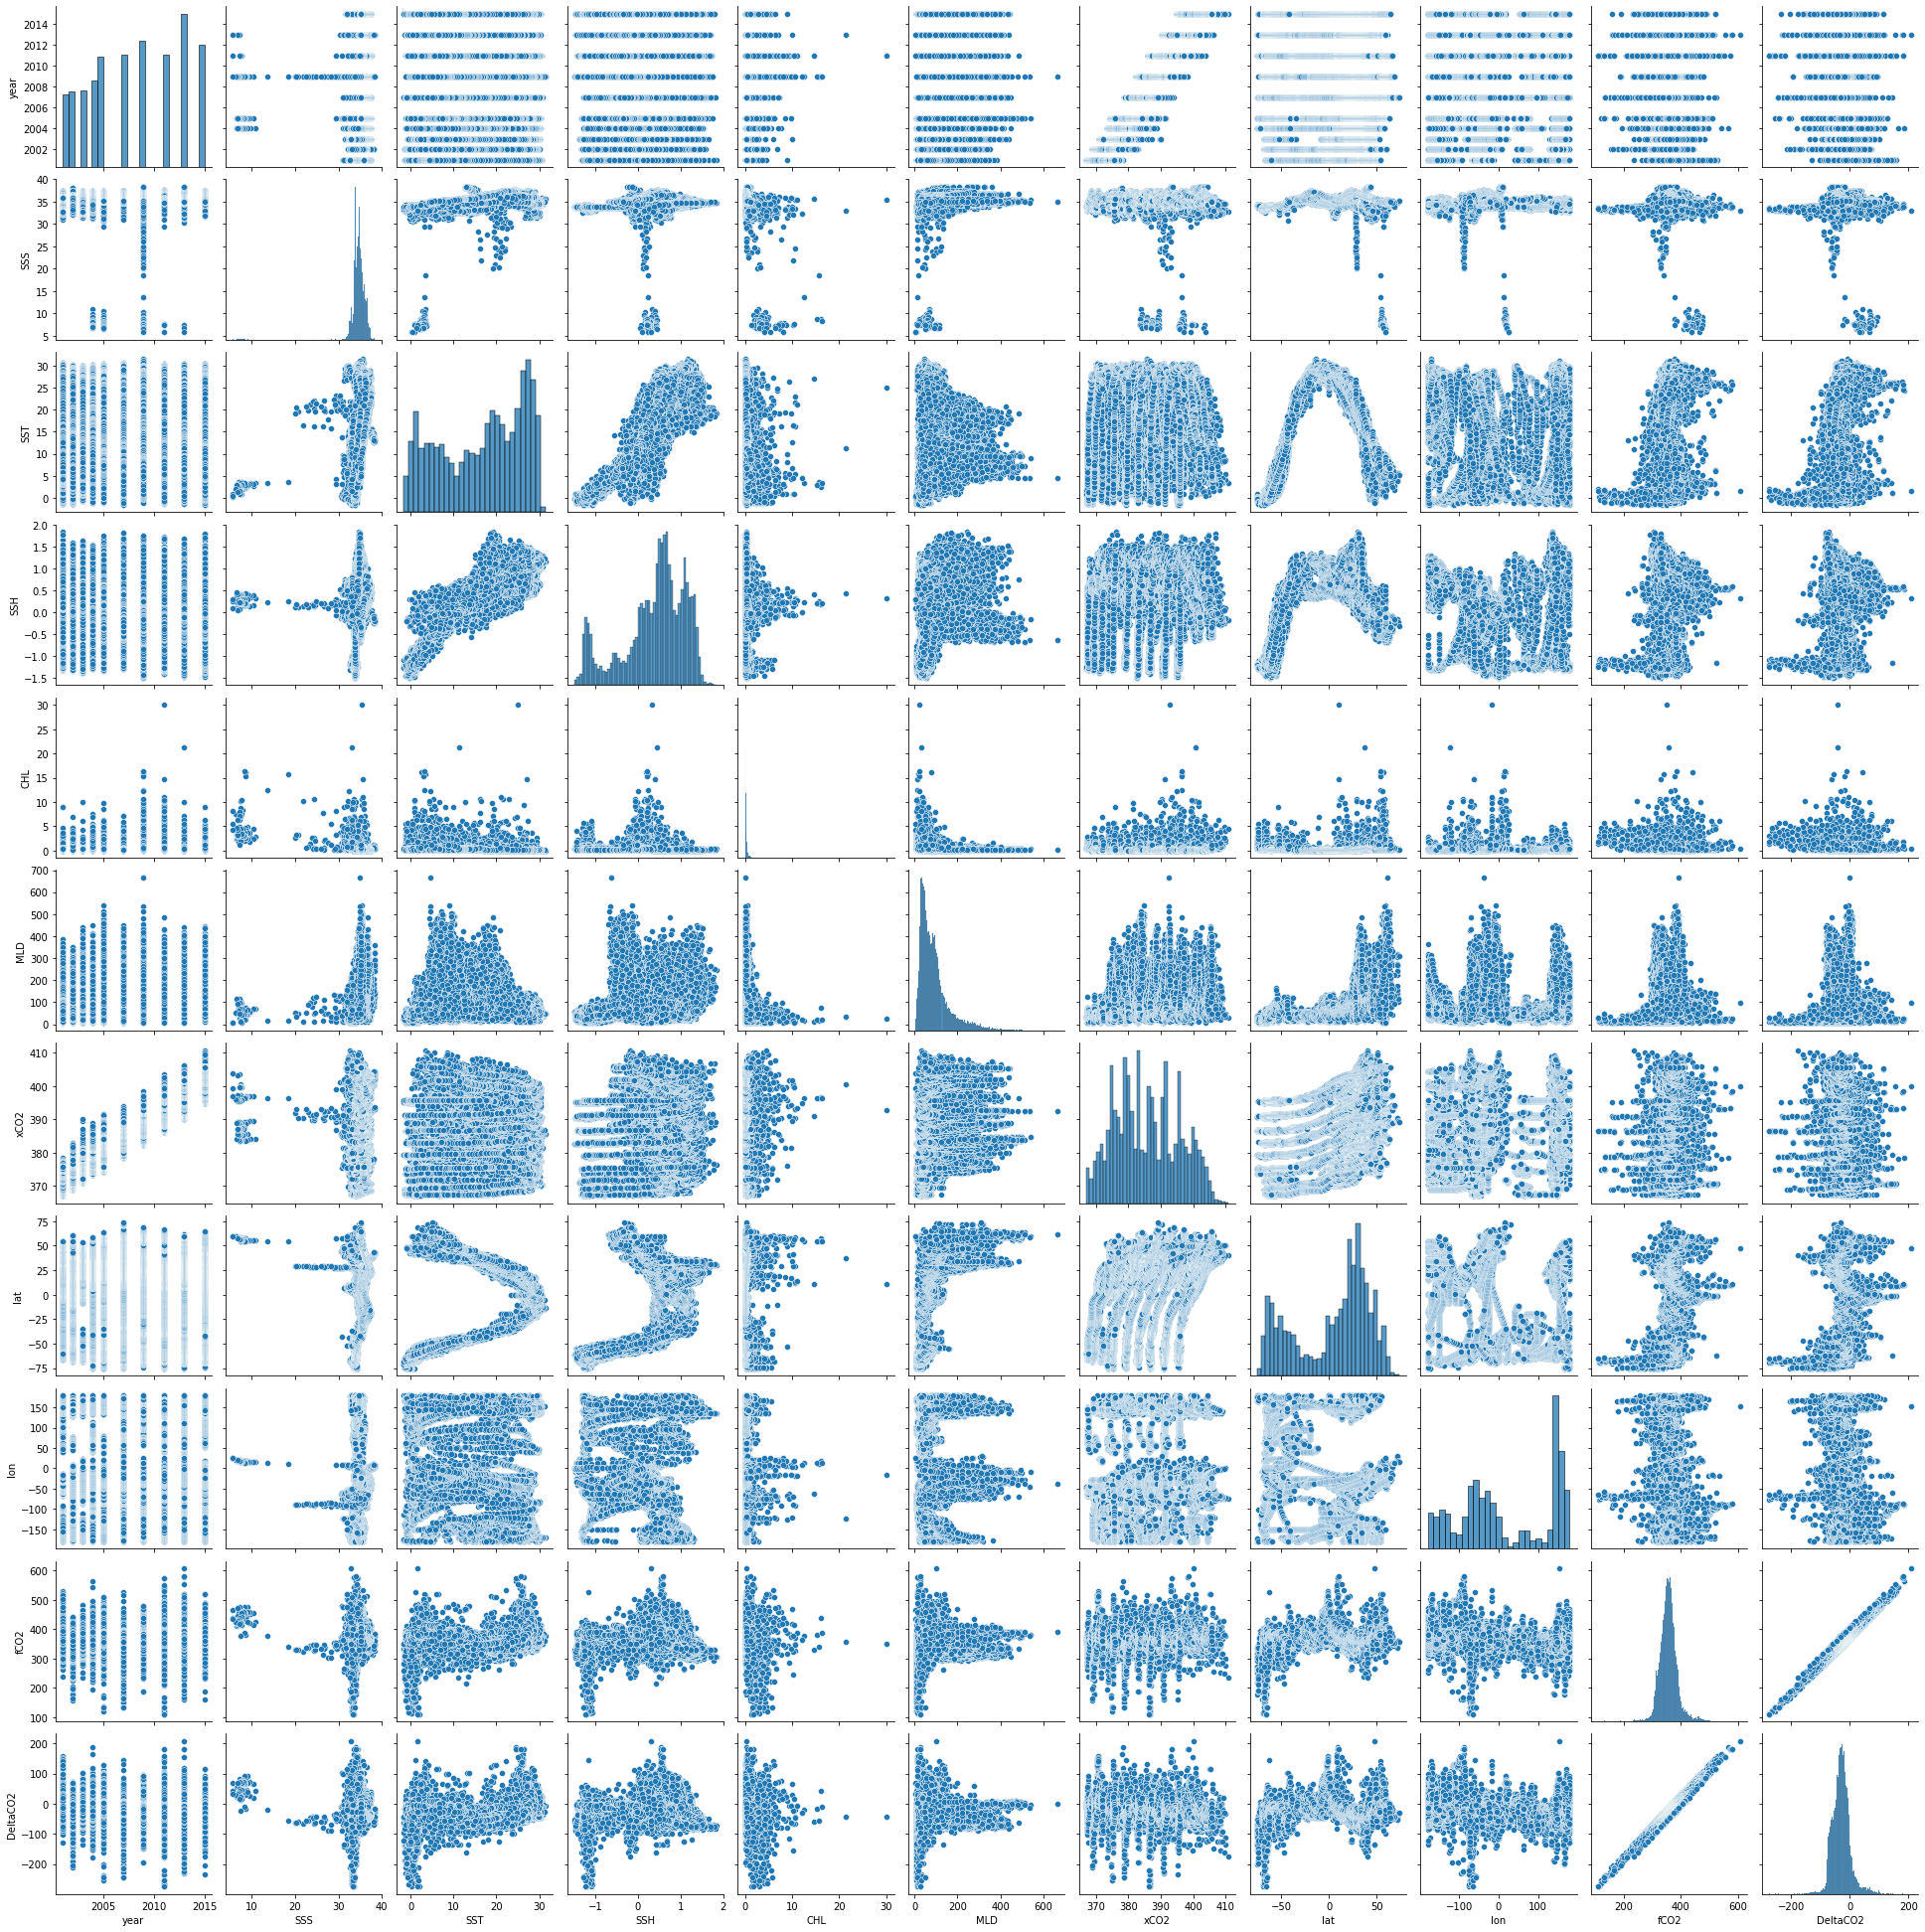

In [6]:
sns.pairplot(data)

In [11]:
predictors

,year,SSS,SST,SSH,CHL,MLD,xCO2,lat,lon
0,2001.0,33.824438,-0.812313,-1.297375,0.395534,15.281344,367.386291,-66.5,142.5
1,2001.0,33.793714,-0.825357,-1.278312,0.365394,15.439311,367.369910,-66.5,143.5
2,2001.0,33.800500,-0.956571,-1.255688,0.332476,16.350091,367.356882,-66.5,144.5
3,2001.0,33.805937,-0.947063,-1.252312,0.311651,16.354686,367.357386,-66.5,145.5
4,2001.0,33.813375,-0.770188,-1.246063,0.368403,18.278711,367.348208,-66.5,146.5
...,...,...,...,...,...,...,...,...,...
26505,2015.0,35.131500,6.596063,-0.379125,0.204273,337.523270,405.540617,63.5,-25.5
26506,2015.0,35.154500,6.658062,-0.372188,0.271125,270.862241,405.539522,63.5,-24.5
26507,2015.0,35.177625,6.720250,-0.368437,0.346958,221.732164,405.537374,63.5,-23.5
26508,2015.0,35.077062,5.504500,-0.354688,0.544910,123.338157,405.571033,64.5,-23.5


## Baseline Solution - Linear Regression on Raw Data

In [7]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

# helper function to plot results
def plot_obs_vs_pred(obs, pred, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(1,1)
    else:
        fig = ax.get_figure()
    
    r2 = r2_score(obs, pred)
    rmse = mean_squared_error(obs, pred)**0.5
    
    ax.scatter(obs, pred, label=f'{r2:0.3f}, {rmse:0.2f}', **kwargs)
    
    mn = min(ax.get_xlim()[0], ax.get_ylim()[0])
    mx = max(ax.get_xlim()[1], ax.get_ylim()[1])
    ax.set_xlim(mn,mx)
    ax.set_ylim(mn,mx)    
    ax.plot([mn,mx], [mn,mx], ls='dashed', c=(0,0,0,0.6))
    
    ax.legend(title='R2, RMSE')
    
    return fig, ax

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

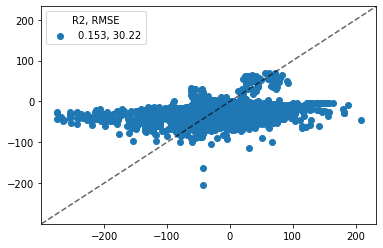

In [8]:
model_LR = LinearRegression().fit(predictors, target)

predictions_LR = model_LR.predict(predictors)

plot_obs_vs_pred(target, predictions_LR)

## Improve this model...

## Evaluation - Apply to Gridded Data

In [83]:
# grid of test data
grid_df = pd.read_csv('data/testmap.csv')
# wind and cell area data for CO2 flux calculation
grid_wind = pd.read_csv('data/wind.csv')

# Helper functions for calculating flux and plotting the gridded predictions
def calc_CO2_flux(DelCO2, grid_wind, unit='Pg'):
    """
    Returns carbon flux in moles, g or pG (1e15 g) of carbon (not CO2) per year.
    
    F = A * E * DeltaCO2
    
    where:
        A is area in m2
        E is the gas transfer coefficient (mol CO2 m-2 yr-1 uatm-1) from Wanninkhof (1992)
        DeltaCO2 is the difference in pCO2 in uatm
    
    The gas transfer coefficient is an area of uncertainty. See Takahashi et al (1997, 10.1073/pnas.94.16.8292) for discussion.
    
    """
    E = 1.13e-3 * grid_wind.wind**2  # Gas transfer coefficient from Wanninkhof (1992)
    F = np.sum(grid_wind.area * E * DelCO2)  # moles of C yr-1
    
    mC = 12.0107  # mass of C
    
    if unit=='g':
        return F * mC
    elif unit=='Pg':
        return  F * mC * 1e-15
    
    return F

def plot_grid(pred_DeltaCO2):
    pred_grid = np.full((178, 360), np.nan)
    lon = np.arange(-179.5, 179.6, 1)
    lat = np.arange(-88.5, 88.6, 1)
    X, Y = np.meshgrid(lon, lat)

    # assemble 2D grid
    for i, p in enumerate(pred_DeltaCO2):
        r = grid_df.iloc[i]
        pred_grid[(X==r.lon)  & (Y==r.lat)] = p
    
    fig = plt.figure(figsize=[8, 5])
    plt.pcolormesh(X, Y, pred_grid, shading='auto')
    
def plot_hist(pred_DeltaCO2):
    bins = np.linspace(-150, 100, 50)
    plt.hist(data['DeltaCO2'], bins=bins, label='GLODAP Bottles 2001-2015')
    plt.hist(pred_DeltaCO2, bins=bins, alpha=0.7, label='Prediction Feb 2019');
    plt.legend()
    plt.xlabel('$\Delta pCO_2$')
    plt.ylabel('n')

In [79]:
pred_DeltaCO2 = model_LR.predict(grid_df)

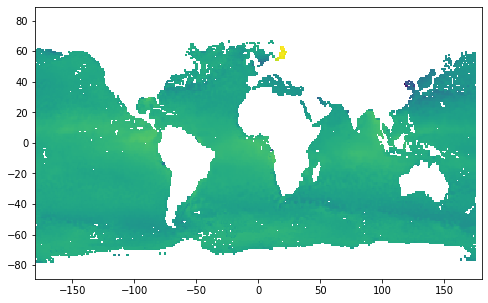

In [81]:
plot_grid(pred_DeltaCO2)

In [82]:
calc_CO2_flux(pred_DeltaCO2, grid_wind)

-11.826105947739526

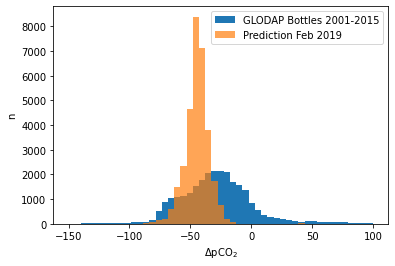

In [84]:
plot_hist(pred_DeltaCO2)